# Identifying variables that determine the location of LSZs

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scale for maps
from matplotlib_scalebar.scalebar import ScaleBar
# Personalised legends for maps
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import os

import geopandas as gpd
import rasterio as rio
import fiona
import contextily
import osmnx
from shapely import geometry

In [2]:
# Set working directory
os.chdir("/Users/unaioyon/Desktop/masters_thesis/data/fra")

In [3]:
# DV3F
dv3f = gpd.read_file("dv3f_new_variables/dv3f_geo_light.geojson")

In [4]:
# Accidents
acc = gpd.read_file("accidents/final/accidents_final_geo.geojson")

In [3]:
# Arrondissements
arr = gpd.read_file("arrondissements/arrondissements.shp")
# IRIS
iris = gpd.read_file("iris/geo/iris_paris_2022/1_DONNEES_LIVRAISON_2022-05-00266/IRIS-GE_2-0_SHP_LAMB93_D075-2022/IRIS_GE.shp")
# Quartiers
quart = gpd.read_file("quartiers/quartier_paris.shp")
# Streets
voie = gpd.read_file("streets/troncon_voie.shp")
# Zones 30
zones = gpd.read_file("zones_30/zones-30.shp")

In [6]:
# Water bodies
eau = gpd.read_file("eau/plan-de-voirie-voies-deau.shp")
# Green spaces
green = gpd.read_file("green_spaces/espaces_verts.shp")

In [7]:
# Schools
col = gpd.read_file("schools/colleges/etablissements-scolaires-colleges.shp")
mat = gpd.read_file("schools/maternelles/etablissements-scolaires-maternelles.shp")
ele = gpd.read_file("schools/elementary/etablissements-scolaires-ecoles-elementaires.shp")

In [8]:
# Transport
arrets = gpd.read_file("transport/idf_mobilites/arrets/arrets_paris.geojson")
zarrets = gpd.read_file("transport/idf_mobilites/z_arrets/z_arrets_paris.shp")
zcorr = gpd.read_file("transport/idf_mobilites/z_correspondances/z_correspondances_paris.shp")

In [45]:
# Bureaux de vote
vote = gpd.read_file("elections/2014/geo_2014.geojson")

In [6]:
# Metro stations
metro = gpd.read_file("delineation/metro_stations.geojson")

In [5]:
arr.to_crs("4326", inplace = True)
iris.to_crs("4326", inplace = True)
quart.to_crs("4326", inplace = True)
zones.to_crs("4326", inplace = True)
metro.to_crs("4326", inplace = True)

In [9]:
# Make their CRS compatible
dv3f.to_crs("4326", inplace = True)
acc.to_crs("4326", inplace = True)
arr.to_crs("4326", inplace = True)
eau.to_crs("4326", inplace = True)
green.to_crs("4326", inplace = True)
iris.to_crs("4326", inplace = True)
quart.to_crs("4326", inplace = True)
col.to_crs("4326", inplace = True)
mat.to_crs("4326", inplace = True)
ele.to_crs("4326", inplace = True)
voie.to_crs("4326", inplace = True)
arrets.to_crs("4326", inplace = True)
zarrets.to_crs("4326", inplace = True)
zcorr.to_crs("4326", inplace = True)
zones.to_crs("4326", inplace = True)
vote.to_crs("4326", inplace = True)

# 1. Assigning stuff to IRIS

## 1.1 DV3F & accidents

In [ ]:
# DV3F & accidents are already assigned

## 1.2. Schools

In [12]:
# School type
col["type"] = "college"
mat["type"] = "maternelle"
ele["type"] = "elementaire"

In [17]:
# COLLÈGE
# Creating the variables
col.insert(12,"slow_zone", pd.Series([], dtype = "object"))
col.insert(13,"slow_zone_year", pd.Series([], dtype = "object"))
# col.insert(57, "slow_zone_intersect", pd.Series([]))
col.insert(14,"arr", pd.Series([], dtype = "object"))
col.insert(15,"arr_code", pd.Series([], dtype = "object"))
# col.insert(58, "arr_intersect", pd.Series([]))
col.insert(16,"iris", pd.Series([], dtype = "object"))
col.insert(17,"iris_code", pd.Series([], dtype = "object"))
col.insert(18,"iris_name", pd.Series([], dtype = "object"))
# col.insert(59, "iris_intersect", pd.Series([]))

In [19]:
%%time
# Classifying SLOW ZONES
# There are 9 zones with missing geometries, so these ones will not have any transaction inside
zones_non_na = zones[zones["geometry"].isna() == False].copy()

for i in zones_non_na.index:
    col.loc[col["geometry"].within(zones.loc[i, "geometry"]), "slow_zone"] = zones.loc[i, "nom_zca"]
    col.loc[col["geometry"].within(zones.loc[i, "geometry"]), "slow_zone_year"] = zones.loc[i, "year"]
    
# Add a dummy equal to 1 if inside a slow zone
col.insert(14, "slow_zone_d", pd.Series([], dtype = "object"))
col["slow_zone_d"] = 0
col.loc[col["slow_zone"].isna() == False, "slow_zone_d"] = 1

CPU times: user 247 ms, sys: 3.6 ms, total: 251 ms
Wall time: 250 ms


In [25]:
%%time
# Classifying ARRONDISSEMENTS

for i in arr.index:
    col.loc[col["geometry"].within(arr.loc[i, "geometry"]), "arr"] = arr.loc[i, "c_ar"]
    col.loc[col["geometry"].within(arr.loc[i, "geometry"]), "arr_code"] = arr.loc[i, "c_arinsee"]

CPU times: user 81.1 ms, sys: 9.28 ms, total: 90.4 ms
Wall time: 88.4 ms


In [26]:
%%time
# Classifying IRIS

for i in iris.index:
    col.loc[col["geometry"].within(iris.loc[i, "geometry"]), "iris"] = iris.loc[i, "IRIS"]
    col.loc[col["geometry"].within(iris.loc[i, "geometry"]), "iris_code"] = iris.loc[i, "CODE_IRIS"]
    col.loc[col["geometry"].within(iris.loc[i, "geometry"]), "iris_name"] = iris.loc[i, "NOM_IRIS"]

CPU times: user 2.43 s, sys: 13.7 ms, total: 2.45 s
Wall time: 2.44 s


In [28]:
# MATERNELLE
# Creating the variables
mat.insert(9,"slow_zone", pd.Series([], dtype = "object"))
mat.insert(10,"slow_zone_year", pd.Series([], dtype = "object"))
# mat.insert(57, "slow_zone_intersect", pd.Series([]))
mat.insert(11,"arr", pd.Series([], dtype = "object"))
mat.insert(12,"arr_code", pd.Series([], dtype = "object"))
# mat.insert(58, "arr_intersect", pd.Series([]))
mat.insert(13,"iris", pd.Series([], dtype = "object"))
mat.insert(14,"iris_code", pd.Series([], dtype = "object"))
mat.insert(15,"iris_name", pd.Series([], dtype = "object"))
# mat.insert(59, "iris_intersect", pd.Series([]))

In [29]:
%%time
# Classifying SLOW ZONES
# There are 9 zones with missing geometries, so these ones will not have any transaction inside
zones_non_na = zones[zones["geometry"].isna() == False].copy()

for i in zones_non_na.index:
    mat.loc[mat["geometry"].within(zones.loc[i, "geometry"]), "slow_zone"] = zones.loc[i, "nom_zca"]
    mat.loc[mat["geometry"].within(zones.loc[i, "geometry"]), "slow_zone_year"] = zones.loc[i, "year"]
    
# Add a dummy equal to 1 if inside a slow zone
mat.insert(11, "slow_zone_d", pd.Series([], dtype = "object"))
mat["slow_zone_d"] = 0
mat.loc[mat["slow_zone"].isna() == False, "slow_zone_d"] = 1

CPU times: user 644 ms, sys: 11 ms, total: 655 ms
Wall time: 653 ms


In [30]:
%%time
# Classifying ARRONDISSEMENTS

for i in arr.index:
    mat.loc[mat["geometry"].within(arr.loc[i, "geometry"]), "arr"] = arr.loc[i, "c_ar"]
    mat.loc[mat["geometry"].within(arr.loc[i, "geometry"]), "arr_code"] = arr.loc[i, "c_arinsee"]

CPU times: user 208 ms, sys: 3.98 ms, total: 212 ms
Wall time: 209 ms


In [31]:
%%time
# Classifying IRIS

for i in iris.index:
    mat.loc[mat["geometry"].within(iris.loc[i, "geometry"]), "iris"] = iris.loc[i, "IRIS"]
    mat.loc[mat["geometry"].within(iris.loc[i, "geometry"]), "iris_code"] = iris.loc[i, "CODE_IRIS"]
    mat.loc[mat["geometry"].within(iris.loc[i, "geometry"]), "iris_name"] = iris.loc[i, "NOM_IRIS"]

CPU times: user 6.84 s, sys: 37.6 ms, total: 6.88 s
Wall time: 6.88 s


In [33]:
# ÉLÉMENTAIRE
# Creating the variables
ele.insert(9,"slow_zone", pd.Series([], dtype = "object"))
ele.insert(10,"slow_zone_year", pd.Series([], dtype = "object"))
# ele.insert(57, "slow_zone_intersect", pd.Series([]))
ele.insert(11,"arr", pd.Series([], dtype = "object"))
ele.insert(12,"arr_code", pd.Series([], dtype = "object"))
# ele.insert(58, "arr_intersect", pd.Series([]))
ele.insert(13,"iris", pd.Series([], dtype = "object"))
ele.insert(14,"iris_code", pd.Series([], dtype = "object"))
ele.insert(15,"iris_name", pd.Series([], dtype = "object"))
# ele.insert(59, "iris_intersect", pd.Series([]))

In [34]:
%%time
# Classifying SLOW ZONES
# There are 9 zones with missing geometries, so these ones will not have any transaction inside
zones_non_na = zones[zones["geometry"].isna() == False].copy()

for i in zones_non_na.index:
    ele.loc[ele["geometry"].within(zones.loc[i, "geometry"]), "slow_zone"] = zones.loc[i, "nom_zca"]
    ele.loc[ele["geometry"].within(zones.loc[i, "geometry"]), "slow_zone_year"] = zones.loc[i, "year"]
    
# Add a dummy equal to 1 if inside a slow zone
ele.insert(11, "slow_zone_d", pd.Series([], dtype = "object"))
ele["slow_zone_d"] = 0
ele.loc[ele["slow_zone"].isna() == False, "slow_zone_d"] = 1

CPU times: user 649 ms, sys: 8.86 ms, total: 658 ms
Wall time: 656 ms


In [35]:
%%time
# Classifying ARRONDISSEMENTS

for i in arr.index:
    ele.loc[ele["geometry"].within(arr.loc[i, "geometry"]), "arr"] = arr.loc[i, "c_ar"]
    ele.loc[ele["geometry"].within(arr.loc[i, "geometry"]), "arr_code"] = arr.loc[i, "c_arinsee"]

CPU times: user 205 ms, sys: 3.21 ms, total: 208 ms
Wall time: 206 ms


In [36]:
%%time
# Classifying IRIS

for i in iris.index:
    ele.loc[ele["geometry"].within(iris.loc[i, "geometry"]), "iris"] = iris.loc[i, "IRIS"]
    ele.loc[ele["geometry"].within(iris.loc[i, "geometry"]), "iris_code"] = iris.loc[i, "CODE_IRIS"]
    ele.loc[ele["geometry"].within(iris.loc[i, "geometry"]), "iris_name"] = iris.loc[i, "NOM_IRIS"]

CPU times: user 6.72 s, sys: 37 ms, total: 6.75 s
Wall time: 6.76 s


In [37]:
ele.head()

,id_projet,libelle,adresse,arr_libelle,arr_insee,annee_scol,type_etabl,created_use,created_dat,slow_zone,slow_zone_year,slow_zone_d,arr,arr_code,iris,iris_code,iris_name,last_edited,geometry,type
0,ELEMENTAIRES (annÃ©e scolaire 2019/2020),FAGON (13) ELEM,13 RUE FAGON,13Ã¨me Ardt,75113,NaN,NaN,NaN,NaN,NaN,NaN,0,13,75113,4903,751134903,Salpêtrière 3,NaN,POINT (2.35695 48.83255),elementaire
1,ELEMENTAIRES (annÃ©e scolaire 2019/2020),MADAME (42) ELEM,42 RUE MADAME,6Ã¨me Ardt,75106,NaN,NaN,NaN,NaN,NaN,NaN,0,6,75106,2311,751062311,Notre-Dame des Champs 11,NaN,POINT (2.33160 48.84894),elementaire
2,ELEMENTAIRES (annÃ©e scolaire 2019/2020),FRERES VOISIN (3) POLY,3 BOULEVARD DES FRERES VOISIN,15Ã¨me Ardt,75115,NaN,NaN,NaN,NaN,NaN,NaN,0,15,75115,6001,751156001,Javel 1,NaN,POINT (2.26834 48.82796),elementaire
3,ELEMENTAIRES (annÃ©e scolaire 2019/2020),MOUSSY (9) ELEM,9 RUE DE MOUSSY,4Ã¨me Ardt,75104,NaN,NaN,NaN,NaN,Marais,2013,1,4,75104,1402,751041402,Saint-Gervais 2,NaN,POINT (2.35561 48.85774),elementaire
4,ELEMENTAIRES (annÃ©e scolaire 2019/2020),TURGOT (15) ELEM,15 RUE TURGOT,9Ã¨me Ardt,75109,NaN,NaN,NaN,NaN,NaN,NaN,0,9,75109,3608,751093608,Rochechouart 8,NaN,POINT (2.34515 48.88050),elementaire


In [38]:
# Now, merge all of them in a single dataframe
schools = gpd.GeoDataFrame(pd.concat([col, mat, ele]),
                          geometry = "geometry")

In [44]:
# Save it
schools.to_file("delineation/schools.geojson")

## 1.3. Elections: bureaux de vote

In [58]:
# Reproject to a projected CRS for Northern France
iris.to_crs("27561", inplace = True)
vote.to_crs("27561", inplace = True)

In [83]:
%%time


# Change the index to make sure weights are created correctly
iris.set_index(iris["CODE_IRIS"], drop = False, inplace = True)

# Loop assigning weights
iris_bureaux = gpd.GeoDataFrame()

# Visualize progress
k = 0

for i in iris["CODE_IRIS"]:
    # Create the object in which the overlaid dataframes will be stored iteratively
    iris_overlay = gpd.GeoDataFrame()
    
    # Create the overlay selecting the IRIS so that the intput is a (geo)dataframe
    iris_overlay = gpd.overlay(iris[iris["CODE_IRIS"] == i],
                              vote,
                              how = "intersection",
                              keep_geom_type = False)
        
        
    # Rename variables
    iris_overlay.rename(columns = {"CODE_IRIS": "iris", "id_bv": "ID_BVOTE"},
                        inplace = True)
        
        
    # Select variables
    iris_overlay_selected = iris_overlay[["iris", "ID_BVOTE", "geometry"]].copy()
    iris_overlay_selected["weights"] = iris_overlay_selected["geometry"].area/iris.loc[i, "geometry"].area
    
    # Visualize progress
    k = k + 1
    print(round((k/992)*100, ndigits = 2), "percent computed")
    
    # Join to the main dataframe
    iris_bureaux = gpd.GeoDataFrame(pd.concat([iris_bureaux, iris_overlay_selected], ignore_index = True), 
                                   crs = iris_overlay_selected.crs)
    
# Go back to EPSG:4326
iris_bureaux.to_crs("4326", inplace = True)

# Save the dataset
iris_bureaux.to_file("delineation/iris_bureaux_vote.geojson")

0.1 percent computed
0.2 percent computed
0.3 percent computed
0.4 percent computed
0.5 percent computed
0.6 percent computed
0.71 percent computed
0.81 percent computed
0.91 percent computed
1.01 percent computed
1.11 percent computed
1.21 percent computed
1.31 percent computed
1.41 percent computed
1.51 percent computed
1.61 percent computed
1.71 percent computed
1.81 percent computed
1.92 percent computed
2.02 percent computed
2.12 percent computed
2.22 percent computed
2.32 percent computed
2.42 percent computed
2.52 percent computed
2.62 percent computed
2.72 percent computed
2.82 percent computed
2.92 percent computed
3.02 percent computed
3.12 percent computed
3.23 percent computed
3.33 percent computed
3.43 percent computed
3.53 percent computed
3.63 percent computed
3.73 percent computed
3.83 percent computed
3.93 percent computed
4.03 percent computed
4.13 percent computed
4.23 percent computed
4.33 percent computed
4.44 percent computed
4.54 percent computed
4.64 percent com

36.69 percent computed
36.79 percent computed
36.9 percent computed
37.0 percent computed
37.1 percent computed
37.2 percent computed
37.3 percent computed
37.4 percent computed
37.5 percent computed
37.6 percent computed
37.7 percent computed
37.8 percent computed
37.9 percent computed
38.0 percent computed
38.1 percent computed
38.21 percent computed
38.31 percent computed
38.41 percent computed
38.51 percent computed
38.61 percent computed
38.71 percent computed
38.81 percent computed
38.91 percent computed
39.01 percent computed
39.11 percent computed
39.21 percent computed
39.31 percent computed
39.42 percent computed
39.52 percent computed
39.62 percent computed
39.72 percent computed
39.82 percent computed
39.92 percent computed
40.02 percent computed
40.12 percent computed
40.22 percent computed
40.32 percent computed
40.42 percent computed
40.52 percent computed
40.62 percent computed
40.73 percent computed
40.83 percent computed
40.93 percent computed
41.03 percent computed
4

72.98 percent computed
73.08 percent computed
73.19 percent computed
73.29 percent computed
73.39 percent computed
73.49 percent computed
73.59 percent computed
73.69 percent computed
73.79 percent computed
73.89 percent computed
73.99 percent computed
74.09 percent computed
74.19 percent computed
74.29 percent computed
74.4 percent computed
74.5 percent computed
74.6 percent computed
74.7 percent computed
74.8 percent computed
74.9 percent computed
75.0 percent computed
75.1 percent computed
75.2 percent computed
75.3 percent computed
75.4 percent computed
75.5 percent computed
75.6 percent computed
75.71 percent computed
75.81 percent computed
75.91 percent computed
76.01 percent computed
76.11 percent computed
76.21 percent computed
76.31 percent computed
76.41 percent computed
76.51 percent computed
76.61 percent computed
76.71 percent computed
76.81 percent computed
76.92 percent computed
77.02 percent computed
77.12 percent computed
77.22 percent computed
77.32 percent computed
7

<AxesSubplot: >

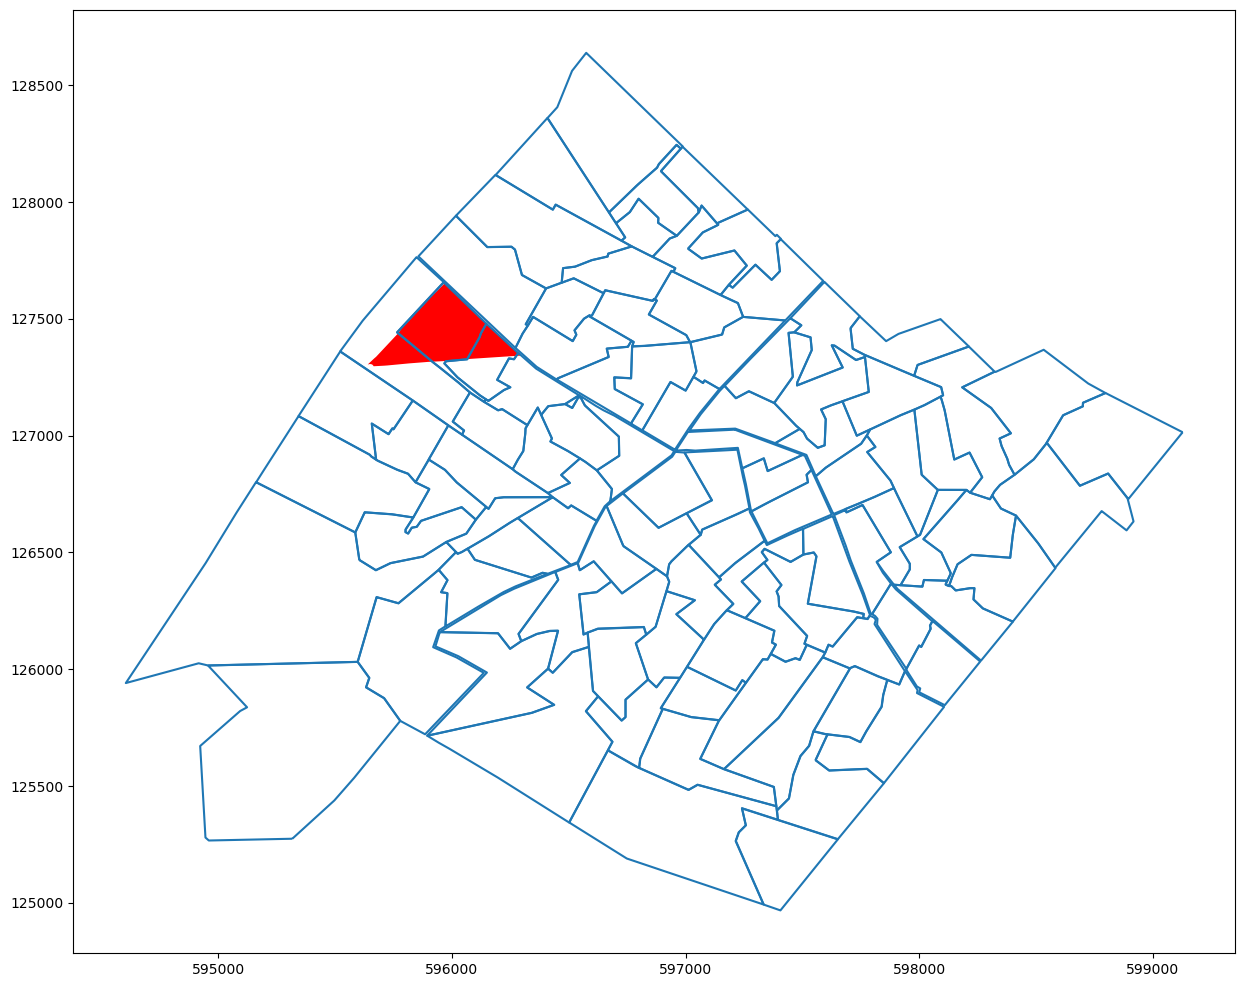

In [73]:
# Again, the do not sum up to 1 in all cases. The same happened in a previous project with ZIP codes and
# census tracts in Spain. Do some manual checks

fig, ax = plt.subplots(1, figsize = (15, 15))

iris[iris["CODE_IRIS"] == "751156014"].plot(ax = ax, color = "red")
vote[vote["num_arr"] == 15].boundary.plot(ax = ax)

## 1.4. Metro stations

In [9]:
len(metro.columns)

27

In [8]:
metro.head()

,geo_point_2d,id_gares,nom_gares,nom_so_gar,nom_su_gar,id_ref_lda,nom_lda,id_ref_zdl,nom_zdl,idrefliga,...,tertram,terval,exploitant,idf,principal,x,y,picto,nom_iv,geometry
0,"{'lon': 2.324224580938852, 'lat': 48.875719088...",1000,Saint-Lazare,NaN,NaN,71370,Gare Saint-Lazare,58566,Gare Saint-Lazare,A01547,...,0,0,RATP,1,1,650434.6278,6.864178e+06,"{'thumbnail': True, 'filename': 'metro_14.svg'...",Saint-Lazare,POINT (2.32422 48.87572)
1,"{'lon': 2.3954619948327394, 'lat': 48.84737487...",585,Nation,NaN,NaN,71673,Nation,473875,Nation,A01539,...,0,0,RATP,1,0,655635.3640,6.860984e+06,"{'thumbnail': True, 'filename': 'metro_6.svg',...",Nation,POINT (2.39546 48.84737)
2,"{'lon': 2.346470902107097, 'lat': 48.936155626...",760,Saint-Denis,NaN,NaN,72323,Saint-Denis,412743,Saint-Denis,A01191,...,0,0,RATP,1,0,652121.8885,6.870885e+06,"{'thumbnail': True, 'filename': 'tram_T1.svg',...",Saint-Denis,POINT (2.34647 48.93616)
3,"{'lon': 2.4233851067979795, 'lat': 48.93028786...",1207,Le Bourget,NaN,NaN,72641,Le Bourget,43231,Le Bourget,A02225,...,0,0,SNCF,1,0,657751.8185,6.870189e+06,"{'thumbnail': True, 'filename': 'tram_T11.svg'...",Le Bourget,POINT (2.42339 48.93029)
4,"{'lon': 2.2388873271530727, 'lat': 48.84200534...",99,Boulogne - Jean Jaurès,NaN,NaN,71147,Boulogne Jean Jaurès,42380,Boulogne Jean Jaurès,A01543,...,0,0,RATP,1,0,644139.5372,6.860487e+06,"{'thumbnail': True, 'filename': 'metro_10.svg'...",Boulogne - Jean Jaurès,POINT (2.23889 48.84201)


In [10]:
# METRO STATIONS
# Creating the variables
metro.insert(27,"slow_zone", pd.Series([], dtype = "object"))
metro.insert(28,"slow_zone_year", pd.Series([], dtype = "object"))
# metro.insert(57, "slow_zone_intersect", pd.Series([]))
metro.insert(29,"arr", pd.Series([], dtype = "object"))
metro.insert(30,"arr_code", pd.Series([], dtype = "object"))
# metro.insert(58, "arr_intersect", pd.Series([]))
metro.insert(31,"iris", pd.Series([], dtype = "object"))
metro.insert(32,"iris_code", pd.Series([], dtype = "object"))
metro.insert(33,"iris_name", pd.Series([], dtype = "object"))
# metro.insert(59, "iris_intersect", pd.Series([]))

In [11]:
%%time
# Classifying SLOW ZONES
# There are 9 zones with missing geometries, so these ones will not have any transaction inside
zones_non_na = zones[zones["geometry"].isna() == False].copy()

for i in zones_non_na.index:
    metro.loc[metro["geometry"].within(zones.loc[i, "geometry"]), "slow_zone"] = zones.loc[i, "nom_zca"]
    metro.loc[metro["geometry"].within(zones.loc[i, "geometry"]), "slow_zone_year"] = zones.loc[i, "year"]
    
# Add a dummy equal to 1 if inside a slow zone
metro.insert(28, "slow_zone_d", pd.Series([], dtype = "object"))
metro["slow_zone_d"] = 0
metro.loc[metro["slow_zone"].isna() == False, "slow_zone_d"] = 1

CPU times: user 440 ms, sys: 6.41 ms, total: 446 ms
Wall time: 448 ms


In [12]:
%%time
# Classifying ARRONDISSEMENTS

for i in arr.index:
    metro.loc[metro["geometry"].within(arr.loc[i, "geometry"]), "arr"] = arr.loc[i, "c_ar"]
    metro.loc[metro["geometry"].within(arr.loc[i, "geometry"]), "arr_code"] = arr.loc[i, "c_arinsee"]

CPU times: user 122 ms, sys: 2.82 ms, total: 125 ms
Wall time: 123 ms


In [13]:
%%time
# Classifying IRIS

for i in iris.index:
    metro.loc[metro["geometry"].within(iris.loc[i, "geometry"]), "iris"] = iris.loc[i, "IRIS"]
    metro.loc[metro["geometry"].within(iris.loc[i, "geometry"]), "iris_code"] = iris.loc[i, "CODE_IRIS"]
    metro.loc[metro["geometry"].within(iris.loc[i, "geometry"]), "iris_name"] = iris.loc[i, "NOM_IRIS"]

CPU times: user 4.61 s, sys: 19.8 ms, total: 4.63 s
Wall time: 4.63 s


In [17]:
# There are stations outside of Paris, so I need to remove them later on
metro.to_file("delineation/metro_stations.geojson")